<a href="https://colab.research.google.com/github/Jtouloupis/CovidTweetsAnalyser/blob/main/TweetAnalyserV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Replace the file ID in the link
file_id = '1LT7D3axmdpfNBghUjXC0BtMr5_Ls4HtJ'

# Construct the direct download link
download_link = f'https://drive.google.com/uc?id={file_id}'

# Load the CSV file into a DataFrame
data = pd.read_csv(download_link, encoding='latin-1', header=0)


In [ ]:
#Let's keep only the columns that we're going to use
data = data[['Tweets','Type']]
data.head()


,Tweets,Type
0,How to lose the publics trust 2 weeks to flatt...,1
1,"Grifters gonna grift.\n\nRemember, when antiva...",0
2,With the modern #antivax paranoia about comput...,0
3,Sorry \n@Daily_Express\n how how the hell does...,0
4,Antivax or anti untested-dodgy-pharma-product ...,1


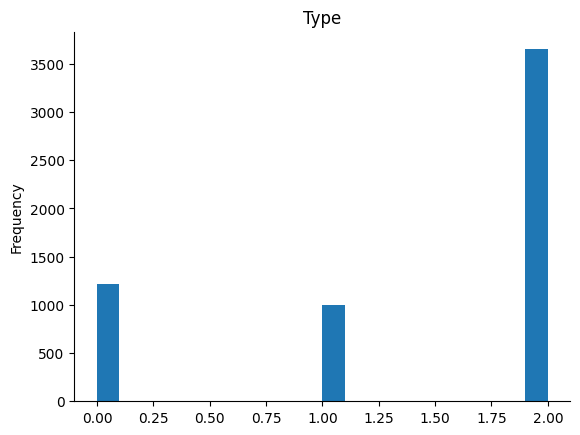

In [ ]:
# @title Type

from matplotlib import pyplot as plt
data['Type'].plot(kind='hist', bins=20, title='Type')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Shuffle the rows using the sample function
df_shuffled = data.sample(frac=1)

# Reset the index of the shuffled DataFrame
data = df_shuffled.reset_index(drop=True)

print(data)

                                                 Tweets  Type
0     Coronavirus Postponement Of "No Time To Die" T...     2
1     Important to remember. National Security Advis...     2
2     US coronavirus cases top 1,000 as WHO declares...     2
3     Coronavirus: No Arsenal players or staff to be...     2
4     Exactly the CDC message on autism. We dont kno...     1
...                                                 ...   ...
5855  #Coronavirus: #Italy sees nearly 200 deaths in...     2
5856  fellas is it gay to wash your hands bc of coro...     2
5857  Not getting the logic of @Coles suspending onl...     2
5858  Switzerland stops #CovidVaccines: All vaccine ...     2
5859  #Budget2020: Chancellor says there will be "te...     2

[5860 rows x 2 columns]


In [ ]:
pip install nltk


In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')


# Define the remove_links function
def remove_links(text):
    # Implement your logic to remove links from the text
    # For example, using regex:
    return re.sub(r'http\S+', '', text)


# Define the function to remove '@' tags
def remove_tags(text):
    # Remove '@' tags from the text
    return re.sub(r'@\S+', '', text)


# Apply the remove_links function and convert each string to lowercase
data['Tweets'] = data['Tweets'].apply(remove_links).str.lower()

# Remove stopwords using NLTK
stop_words = set(stopwords.words('english'))
data['Tweets'] = data['Tweets'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Check for null values in 'Tweets' and 'type' columns
null_values_tweets = data['Tweets'].isnull().any()
null_values_type = data['Type'].isnull().any()

# Print the results
print(f"Null values in 'Tweets': {null_values_tweets}")
print(f"Null values in 'type': {null_values_type}")

Null values in 'Tweets': False
Null values in 'type': False


In [ ]:
#Datasets distribution
data.groupby('Type').nunique()

,Tweets
Type,
0,1183
1,970
2,3585


In [ ]:
data.describe()

,Type
count,5860.000000
mean,1.416041
std,0.810590
min,0.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,2.000000


In [ ]:
#Is there any other different value than neutral, negative and positive?
data['Type'].unique()

array([2, 1, 0])

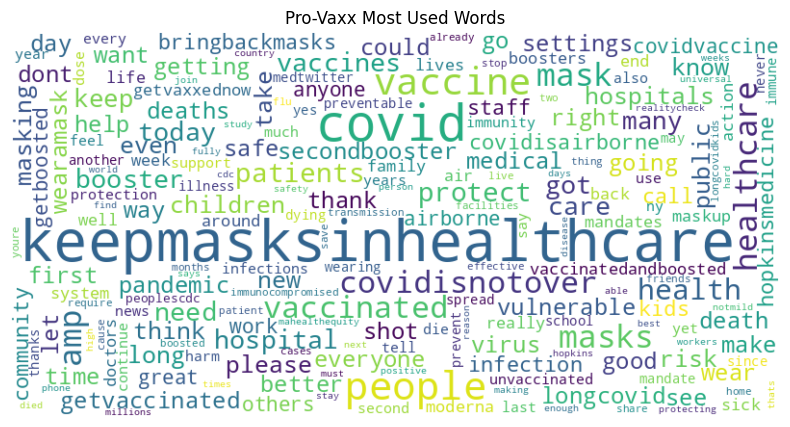

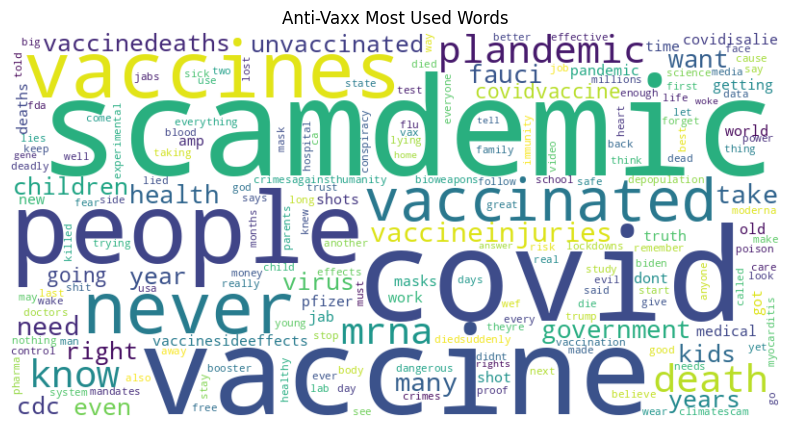

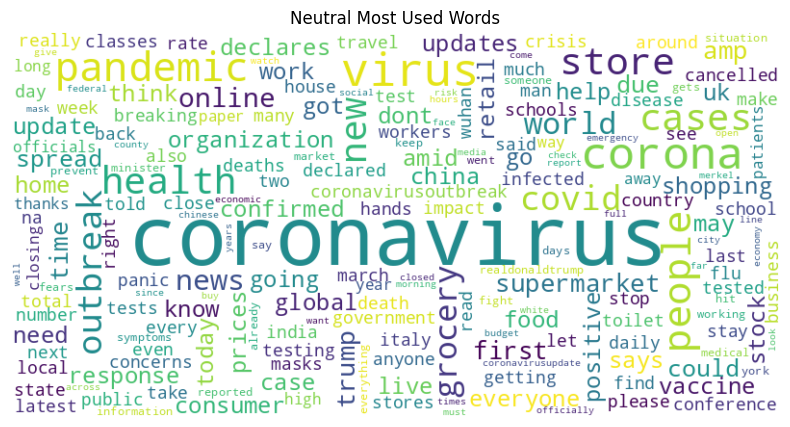

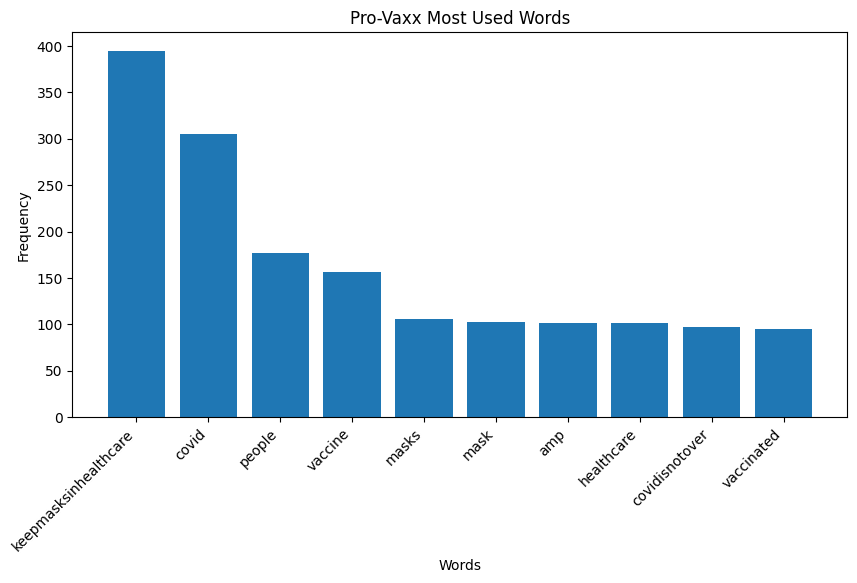

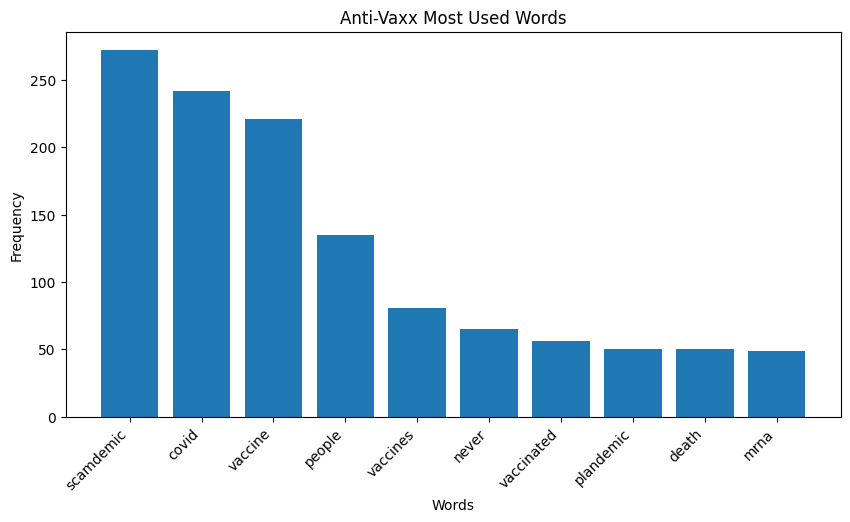

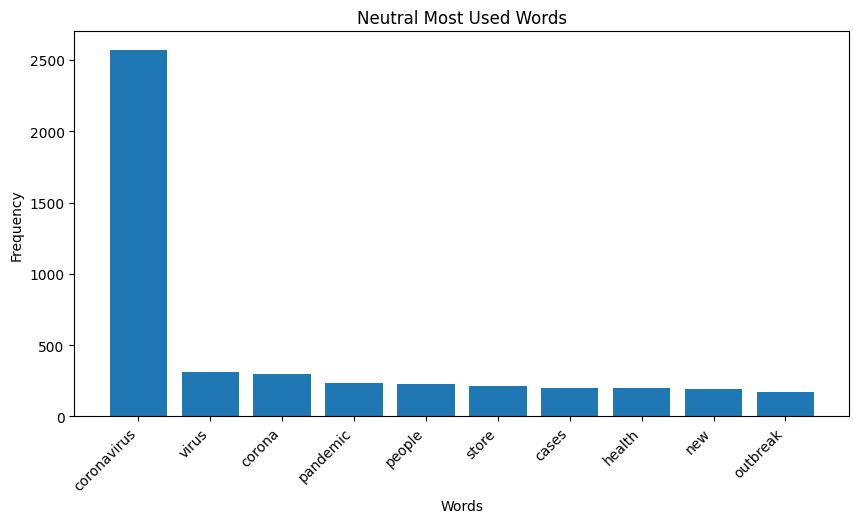

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud


# Define stopwords - common English words to ignore
stopwords = set(['i', 'me', 'my', 'myself', 'we', 'our','so', 'can','when','like', 'via', 'one' 'more', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them','would','some','im', 'their', 'theirs','us', 'why','than','there','more','still','one', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'not' ,'will' ,'all' ,'how' , 'get', 'no', 'get', 'just'])

# Create dictionaries to store word frequencies for each category
pro_vax_words = Counter()
anti_vax_words = Counter()
neutral_words = Counter()

# Define a function for text preprocessing
def preprocess_text(text):
    # Tokenize and convert to lowercase
    words = text.split()
    # Remove stopwords and non-alphabetic characters
    words = [word for word in words if word.isalpha() and word not in stopwords]
    return words

# Iterate through the tweets and update word frequencies based on category
for index, row in data.iterrows():
    tweet_text = row['Tweets']
    words = preprocess_text(tweet_text)
    if row['Type'] == 0:
        pro_vax_words.update(words)
    elif row['Type'] == 1:
        anti_vax_words.update(words)
    elif row['Type'] == 2:
        neutral_words.update(words)

# Define a function to plot word frequencies
def plot_word_frequencies(word_counts, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Plot word frequencies for each category
plot_word_frequencies(pro_vax_words, "Pro-Vaxx Most Used Words")
plot_word_frequencies(anti_vax_words, "Anti-Vaxx Most Used Words")
plot_word_frequencies(neutral_words, "Neutral Most Used Words")


# Function to plot word frequencies as a bar chart
def plot_word_frequencies_bar(word_counts, title):
    common_words = word_counts.most_common(10)  # Get the top 10 most common words
    words, counts = zip(*common_words)
    plt.figure(figsize=(10, 5))
    plt.bar(words, counts)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Plot word frequencies for each category as bar charts
plot_word_frequencies_bar(pro_vax_words, "Pro-Vaxx Most Used Words")
plot_word_frequencies_bar(anti_vax_words, "Anti-Vaxx Most Used Words")
plot_word_frequencies_bar(neutral_words, "Neutral Most Used Words")


In [ ]:
texts = data["Tweets"].tolist()
labels = data['Type'].tolist()

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = len(texts)  # Maximum number of words to keep

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

max_len = max(len(seq) for seq in sequences)

X = pad_sequences(sequences, maxlen=max_len)
y = np.array(labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler



# Define BiLSTM model architecture
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=False)),
     Dense(64, activation='relu'),
    Dropout(0.2),
     Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

# Compile the model for multi-class classification
optimizer = Adadelta()
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define callbacks for model checkpointing and early stopping
checkpoint_filepath = "best_model.h5"
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,  # specify the file path
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)


early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=8,  # Patience value for early stopping
    restore_best_weights=True
)



# Define the learning rate schedule function
def lr_schedule(epoch):
    initial_lr = 1.0  # Initial learning rate for AdaDelta
    if epoch < 2:
        return initial_lr  # Keep the initial learning rate for the first few epochs
    else:
        return initial_lr * (0.9 ** (epoch - 2))  # Reduce the learning rate by 10% every epoch after the second epoch


# Create the learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)


# Train the model with callbacks
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=6,
    validation_split=0.1,
    callbacks=[model_checkpoint_callback, early_stopping_callback, lr_scheduler]
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Load the saved model with the best performance
saved_model = load_model(checkpoint_filepath)

Epoch 1/20
747/747 [==============================] - 92s 112ms/step - loss: 0.5103 - accuracy: 0.7631 - val_loss: 0.4167 - val_accuracy: 0.8176 - lr: 1.0000
Epoch 2/20
  1/747 [..............................] - ETA: 1:01 - loss: 0.1805 - accuracy: 0.8333

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


747/747 [==============================] - 68s 91ms/step - loss: 0.2950 - accuracy: 0.8788 - val_loss: 0.3392 - val_accuracy: 0.8537 - lr: 1.0000
Epoch 3/20
747/747 [==============================] - 67s 90ms/step - loss: 0.2000 - accuracy: 0.9237 - val_loss: 0.3024 - val_accuracy: 0.8737 - lr: 1.0000
Epoch 4/20
747/747 [==============================] - 67s 90ms/step - loss: 0.1477 - accuracy: 0.9489 - val_loss: 0.3224 - val_accuracy: 0.8778 - lr: 0.9000
Epoch 5/20
747/747 [==============================] - 67s 90ms/step - loss: 0.1129 - accuracy: 0.9616 - val_loss: 0.3682 - val_accuracy: 0.8697 - lr: 0.8100
Epoch 6/20
747/747 [==============================] - 67s 89ms/step - loss: 0.0884 - accuracy: 0.9697 - val_loss: 0.4085 - val_accuracy: 0.8798 - lr: 0.7290
Epoch 7/20
747/747 [==============================] - 64s 86ms/step - loss: 0.0696 - accuracy: 0.9759 - val_loss: 0.4242 - val_accuracy: 0.8758 - lr: 0.6561
Epoch 8/20
747/747 [==============================] - 66s 89ms/step -

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score

# Load the saved model from the checkpoint file
saved_model_filepath = "best_model.h5"
model = load_model(saved_model_filepath)

# List of texts to predict and their actual labels
texts_to_predict = [
    ("covid vaccine protected my elder family", 0),
    ("injuries are happening but they are not many in comparison with the long covid cases", 0),
    ("covid is a created virus that is going to control us", 1),
    ("just wear a mask and protect the others", 0),
    ("On 21 February 2021 I noted in an affidavit that the World Health Organisation had 102,000 reports of COVID vaccine adverse drug reactions on its http://vigiaccess.org database. This week the number passed the 5,000,000 mark.", 2),
    ("injecting children with an experimental gene therapy, silencing critics, and mask mandates. In addition, you have pronouns in your bio and called the Covid vaccines 'safe and effective'.You should keep your mouth shut!", 1),
    ("The Bible has been manipulated by the dark side for a long time. The real bible was found under the Vatican. This guy has many different bibles and shows you the difference in regards to the Mark of the Beast ! COVID SHOT", 1),
    ("Getting Covid is not a personal failing Getting long Covid is not a personal failing Being high risk for Covid is not a personal failing People have about as much control over this as their eye colour. So stop treating all of the above like it’s their fault", 0),
    ("Our Covid data project Is over, but the need for timely data is not. The John Hopkins Coronavirus Resource Centre.", 2),
    ("If you ate ants when you were a child, you're immune to the coronavirus", 1),
    ("I just got vaccinated against COVID-19 and I feel relieved knowing I'm doing my part to protect myself and others. #GetVaccinated", 0),
    ("I refuse to get the COVID-19 vaccine. I don't trust it and I won't be a guinea pig for Big Pharma's experiments. #AntiVax", 1),
    ("Breaking News: Health officials warn of a new COVID-19 variant spreading rapidly in certain regions. Stay vigilant and follow safety guidelines.", 2),
    ("I'm so grateful for the scientists who worked tirelessly to develop the COVID-19 vaccine. Let's trust in science and get vaccinated to end this pandemic!", 0),
    ("Another study shows the COVID-19 vaccine is safe and effective in preventing severe illness and hospitalization. Get vaccinated to protect yourself and others.", 0),
    ("I won't let fear-mongering tactics pressure me into getting the COVID-19 vaccine. Do your research and make an informed decision. #MyBodyMyChoice", 1),
    ("Important Update: COVID-19 cases are on the rise again in many areas. Remember to wear your mask, practice social distancing, and get vaccinated to help curb the spread.", 0),
    ("The COVID-19 vaccine rollout is progressing smoothly, but we must remain vigilant as new variants emerge. Stay informed, stay safe and wear a mask in public spaces when it is needed.", 0),
    ("I'm skeptical about the COVID-19 vaccine. I've heard too many horror stories about adverse reactions. I'll pass for now. #VaccineHesitancy", 1),
    ("Breaking: Health authorities confirm the COVID-19 vaccine is highly effective against the Delta variant. Vaccination remains our best defense against the virus.", 2)
]

# Lists to store predictions and actual labels
predictions = []
actual_labels = []

# Use the saved model to predict the labels for each text
for text, actual_label in texts_to_predict:
    # Tokenize and pad the input text
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_len)

    # Predict the label using the saved model
    prediction = model.predict(padded_sequence)
    predicted_label = np.argmax(prediction)

    # Append the predicted label and actual label to their respective lists
    predictions.append(predicted_label)
    actual_labels.append(actual_label)

    # Print the text and the predicted label
    print(f"Text: {text}\nPredicted Label: {predicted_label}\nActual Label: {actual_label}\n")

# Calculate the number of correct predictions and the overall accuracy
correct_predictions = sum([1 for predicted, actual in zip(predictions, actual_labels) if predicted == actual])
accuracy = accuracy_score(actual_labels, predictions)

# Print the results
print(f"Number of correct predictions: {correct_predictions} out of {len(texts_to_predict)}")
print(f"Accuracy: {accuracy * 100:.2f}%")

1/1 [==============================] - 1s 880ms/step
Text: covid vaccine protected my elder family
Predicted Label: 0
Actual Label: 0

1/1 [==============================] - 0s 34ms/step
Text: injuries are happening but they are not many in comparison with the long covid cases
Predicted Label: 2
Actual Label: 0

1/1 [==============================] - 0s 31ms/step
Text: covid is a created virus that is going to control us
Predicted Label: 1
Actual Label: 1

1/1 [==============================] - 0s 33ms/step
Text: just wear a mask and protect the others
Predicted Label: 0
Actual Label: 0

1/1 [==============================] - 0s 34ms/step
Text: On 21 February 2021 I noted in an affidavit that the World Health Organisation had 102,000 reports of COVID vaccine adverse drug reactions on its http://vigiaccess.org database. This week the number passed the 5,000,000 mark.
Predicted Label: 2
Actual Label: 2

1/1 [==============================] - 0s 32ms/step
Text: injecting children with an 

In [ ]:
texts = data["Tweets"].tolist()
labels = data['Type'].tolist()

In [ ]:
import torch
from torch.utils.data import Dataset

# Load and preprocess the CSV file
class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.max_length = max_length
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):
        text = str(self.texts[index])
        label = self.labels[index]
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            return_tensors='pt',
            truncation=True
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }

In [ ]:
from transformers import BertTokenizer

#Load the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# Load and preprocess the CSV file
dataset = CustomDataset(texts, labels, tokenizer, max_length=128)

In [ ]:
from torch.utils.data import DataLoader

batch_size = 32
train_size = int(0.85 * len(dataset))
train_dataset, test_dataset = torch.utils.data.random_split(dataset , [train_size, len(dataset) - train_size])

train_dataloader = DataLoader(train_dataset , batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
pip install transformers

In [ ]:
#BERT
from transformers import get_linear_schedule_with_warmup,BertForSequenceClassification
import torch.optim as optim
from torch.nn import Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from tqdm import tqdm
import csv



#initialize the model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

#resources configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Freeze some layers
for param in model.bert.embeddings.parameters():
    param.requires_grad = False


#Fine-tune the BERT model
optimizer = optim.AdamW(model.parameters(), lr=2e-5)

num_epochs = 7

# Learning rate scheduling
num_warmup_steps = 0
num_training_steps = num_epochs * len(train_dataloader)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=num_warmup_steps, num_training_steps=num_training_steps)


# Early stopping
best_loss = float('inf')
patience = 5
counter = 0

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    correct_predictions = 0
    total_predictions = 0

    for batch in tqdm(train_dataloader, desc=f"Epoch {epoch+1}/{num_epochs}"):
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits

        loss.backward()
        optimizer.step()
        scheduler.step()

        total_loss += loss.item()
        _, predicted_labels = torch.max(logits, 1)
        correct_predictions += (predicted_labels == labels).sum().item()
        total_predictions += labels.size(0)

    # Calculate accuracy and average loss for the epoch
    accuracy = correct_predictions / total_predictions
    average_loss = total_loss / len(train_dataloader)

    print(f"Epoch {epoch+1}/{num_epochs}:")
    print(f"  Training Accuracy: {accuracy:.4f}")
    print(f"  Training Average Loss: {average_loss:.4f}")

    # Learning rate scheduling step
    scheduler.step()

    # Early stopping check
    if average_loss < best_loss:
        best_loss = average_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping. Model training halted.")
            break


# Confusion Matrix Analysis

#Testing evaluation
model.eval()
all_labels = []
all_predictions = []

with torch.no_grad():
    total_loss = 0
    correct_predictions = 0
    total_predictions = 0

    for batch in test_dataloader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        # Ensure model is on the same device as the data
        model.to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits

        total_loss += loss.item()
        _, predicted_labels = torch.max(logits, 1)
        correct_predictions += (predicted_labels == labels).sum().item()
        total_predictions += labels.size(0)

    accuracy = correct_predictions / total_predictions
    average_loss = total_loss / len(test_dataloader)

    print(f"  Testing Accuracy: {accuracy:.4f}")
    print(f"  Testing Average Loss: {average_loss:.4f}")

# Use the fine-tuned model to make predictions
model.eval()

# Save the model
torch.save(model.state_dict(), 'bert_sentiment_model.pth')

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Epoch 1/7: 100%|██████████| 156/156 [1:35:20<00:00, 36.67s/it]


Epoch 1/7:
  Training Accuracy: 0.7735
  Training Average Loss: 0.5069


Epoch 2/7: 100%|██████████| 156/156 [1:33:50<00:00, 36.09s/it]


Epoch 2/7:
  Training Accuracy: 0.9066
  Training Average Loss: 0.2319


Epoch 3/7: 100%|██████████| 156/156 [1:33:48<00:00, 36.08s/it]


Epoch 3/7:
  Training Accuracy: 0.9484
  Training Average Loss: 0.1412


Epoch 4/7: 100%|██████████| 156/156 [1:34:06<00:00, 36.20s/it]


Epoch 4/7:
  Training Accuracy: 0.9695
  Training Average Loss: 0.0816


Epoch 5/7: 100%|██████████| 156/156 [1:34:00<00:00, 36.16s/it]


Epoch 5/7:
  Training Accuracy: 0.9880
  Training Average Loss: 0.0437


Epoch 6/7: 100%|██████████| 156/156 [1:33:47<00:00, 36.08s/it]


Epoch 6/7:
  Training Accuracy: 0.9922
  Training Average Loss: 0.0269


Epoch 7/7: 100%|██████████| 156/156 [1:33:58<00:00, 36.14s/it]


Epoch 7/7:
  Training Accuracy: 0.9966
  Training Average Loss: 0.0183
  Testing Accuracy: 0.9249
  Testing Average Loss: 0.2661


In [ ]:
# Load the saved model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)
model.load_state_dict(torch.load('bert_sentiment_model.pth'))
model.to(device)
model.eval()

# Function to make predictions on new texts
def predict_sentiment(text):
    inputs = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=128,
        padding='max_length',
        return_tensors='pt',
        truncation=True
    )
    input_ids = inputs['input_ids'].to(device)
    attention_mask = inputs['attention_mask'].to(device)

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        _, predicted_label = torch.max(logits, 1)

    return predicted_label.item()


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
texts = data["Tweets"].tolist()
labels = data['Type'].tolist()
print(labels)
print(texts)

[2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 0, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 0, 0, 0, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 0, 1, 1, 0, 0, 1, 1, 1, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 0, 2, 2, 1, 2, 0, 2, 2, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2, 1, 0, 2, 0, 2, 1, 0, 1, 0, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 1, 2, 1, 2, 2, 1, 1, 2, 0, 1, 1, 2, 2, 1, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 1, 0, 1, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 0, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 1, 2, 1, 0, 0, 2, 0, 1, 2, 2, 2, 0, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 0, 2, 0, 2, 2, 2, 1, 2, 0, 2, 2, 1, 0, 0, 0, 0, 1, 0, 2, 

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from torch.utils.data import DataLoader, SequentialSampler, TensorDataset
from sklearn.metrics import accuracy_score

# Load the fine-tuned model
model_path = 'bert_sentiment_model.pth'  # Path to the saved model state
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)
model.load_state_dict(torch.load(model_path))
model.to('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Define the texts and their corresponding labels
texts_to_predict = [
    ("covid vaccine protected my elder family", 0),
    ("injuries are happening but they are not many in comparison with the long covid cases", 0),
    ("covid is a created virus that is going to control us", 1),
    ("just wear a mask and protect the others", 0),
    ("On 21 February 2021 I noted in an affidavit that the World Health Organisation had 102,000 reports of COVID vaccine adverse drug reactions on its http://vigiaccess.org database. This week the number passed the 5,000,000 mark.", 2),
    ("injecting children with an experimental gene therapy, silencing critics, and mask mandates. In addition, you have pronouns in your bio and called the Covid vaccines 'safe and effective'.You should keep your mouth shut!", 1),
    ("The Bible has been manipulated by the dark side for a long time. The real bible was found under the Vatican. This guy has many different bibles and shows you the difference in regards to the Mark of the Beast ! COVID SHOT", 1),
    ("Getting Covid is not a personal failing Getting long Covid is not a personal failing Being high risk for Covid is not a personal failing People have about as much control over this as their eye colour. So stop treating all of the above like it’s their fault", 0),
    ("Our Covid data project Is over, but the need for timely data is not. The John Hopkins Coronavirus Resource Centre.", 2),
    ("If you ate ants when you were a child, you're immune to the coronavirus", 1),
    ("I just got vaccinated against COVID-19 and I feel relieved knowing I'm doing my part to protect myself and others. #GetVaccinated", 0),
    ("I refuse to get the COVID-19 vaccine. I don't trust it and I won't be a guinea pig for Big Pharma's experiments. #AntiVax", 1),
    ("Breaking News: Health officials warn of a new COVID-19 variant spreading rapidly in certain regions. Stay vigilant and follow safety guidelines.", 2),
    ("I'm so grateful for the scientists who worked tirelessly to develop the COVID-19 vaccine. Let's trust in science and get vaccinated to end this pandemic!", 0),
    ("Another study shows the COVID-19 vaccine is safe and effective in preventing severe illness and hospitalization. Get vaccinated to protect yourself and others.", 0),
    ("I won't let fear-mongering tactics pressure me into getting the COVID-19 vaccine. Do your research and make an informed decision. #MyBodyMyChoice", 1),
    ("Important Update: COVID-19 cases are on the rise again in many areas. Remember to wear your mask, practice social distancing, and get vaccinated to help curb the spread.", 0),
    ("The COVID-19 vaccine rollout is progressing smoothly, but we must remain vigilant as new variants emerge. Stay informed, stay safe and wear a mask in public spaces when it is needed.", 0),
    ("I'm skeptical about the COVID-19 vaccine. I've heard too many horror stories about adverse reactions. I'll pass for now. #VaccineHesitancy", 1),
    ("Breaking: Health authorities confirm the COVID-19 vaccine is highly effective against the Delta variant. Vaccination remains our best defense against the virus.", 2)
]

# Prepare the data for prediction
texts, labels = zip(*texts_to_predict)
input_ids = []
attention_masks = []

# Tokenize and prepare inputs
for text in texts:
    encoded_dict = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=64,  # Adjust max_length as needed
        padding='max_length',
        return_attention_mask=True,
        return_tensors='pt',
        truncation=True
    )
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

# Convert lists to tensors
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Create a DataLoader for sequential predictions
batch_size = 16  # Adjust batch size as needed
dataset = TensorDataset(input_ids, attention_masks, labels)
dataloader = DataLoader(dataset, sampler=SequentialSampler(dataset), batch_size=batch_size)

# Perform predictions and calculate accuracy
model.eval()
all_predictions = []
all_labels = []

# Predict on the provided texts
with torch.no_grad():
    for batch in dataloader:
        input_ids, attention_masks, labels = batch
        input_ids, attention_masks = input_ids.to(device), attention_masks.to(device)

        # Get model predictions
        outputs = model(input_ids, attention_mask=attention_masks)
        logits = outputs.logits

        # Get the class with the highest probability
        predictions = torch.argmax(logits, dim=1).cpu().numpy()

        # Store predictions and labels
        all_predictions.extend(predictions)
        all_labels.extend(labels.numpy())

        # Print the predictions for each text
        for i in range(len(predictions)):
            print(f"Text: {texts[i]}")
            print(f"Predicted Label: {predictions[i]}")
            print(f"Actual Label: {labels.numpy()[i]}")
            print()

# Calculate the accuracy of the predictions
accuracy = accuracy_score(all_labels, all_predictions)

# Print the total number of correct predictions and the accuracy
correct_predictions = sum([pred == actual for pred, actual in zip(all_predictions, all_labels)])
print(f"Number of correct predictions: {correct_predictions} out of {len(texts_to_predict)}")
print(f"Accuracy: {accuracy * 100:.2f}%")
